In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset: Abalone Liga al dataset: https://archive.ics.uci.edu/dataset/1/abalone

Este dataset es para un problema de regresión. El objetivo es determinar la edad de los abalone a través del número de anillos que encontramos en ellos.

Tipo de problema: Regresión para generar predicciones.

Modelo: Para mi solución utilizo un simple modelo de regresión lineal, este modelo cuenta con 2 hiperparametros: el alfa que es el valor que mi gradiente descendiente modifica los coeficientes en cada iteración y el otro hiper parámetro es el número de iteraciones que hace mi gradiente descendiente utiliza.

Datos:

* Número de registros: 4177
* Número de características: 9
* Sex
* Length
* Diameter
* Height
* Whole weight
* Shucked weight
* Viscera weight
* Shell weight
* Rings
* Clase de salida: Rings


Para las métricas de desempeño estoy utilizando R^2 y MSE. El MSE calcula la diferencia entre los valores predecidos y los valores reales, el R^2 muestra cuanta varianza es explicable a traves de mi modelo.


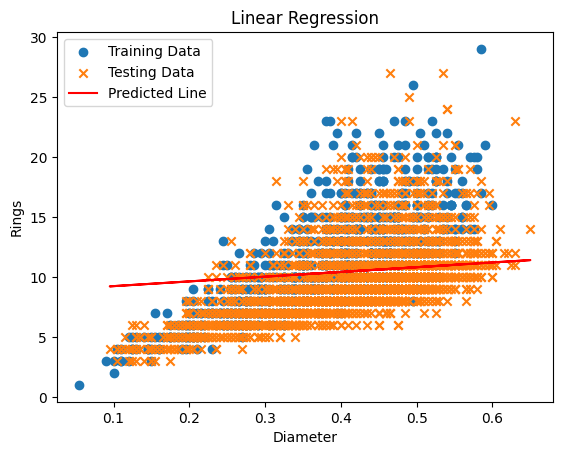

R^2 train:  0.06885134470710907
MSE train:  15.944301920838278
R^2 test:  0.03949605803731249
MSE test:  7.713751957427837
      Actual  Predicted
835        8  10.218622
836        8  10.317247
837        9  10.277797
838        8  10.277797
839        9  10.238347
...      ...        ...
4172      11  10.613121
4173      10  10.573671
4174       9  10.711745
4175      10  10.751195
4176      12  11.027344

[3342 rows x 2 columns]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


def gd(train_X, train_y, a, i):

    b0 = 0
    b1 = 0
    n = len(train_X)

    for _ in range(i):

        b0_gradient = 0
        b1_gradient = 0

        for i in range(n):

            x = train_X[i]
            y = train_y[i]

            b0_gradient += -(2/n) * (y - (b0 + b1 * x))
            b1_gradient += -(2/n) * x * (y - (b0 + b1 * x))

        b0 -= a * b0_gradient
        b1 -= a * b1_gradient

    return b0, b1

def mean_squared_error(actual, predicted):
    n = len(actual)
    squared_errors = [(actual[i] - predicted[i]) ** 2 for i in range(n)]
    mse = sum(squared_errors) / n
    return mse

def r2_score(actual, predicted):
    n = len(actual)
    mean_actual = sum(actual) / n
    ss_total = sum((actual[i] - mean_actual) ** 2 for i in range(n))
    ss_residual = sum((actual[i] - predicted[i]) ** 2 for i in range(n))
    r2 = 1 - (ss_residual / ss_total)
    return r2

def splitData(df_class):
    split_ratio = 0.2
    split_index = int(len(df_class) * split_ratio)

    train_data = df_class.iloc[:split_index]
    test_data = df_class.iloc[split_index:]

    return train_data, test_data

columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

df = pd.read_csv('/content/drive/MyDrive/Stats/abalone.data', header=None, names=columns)

word_to_number = {
    'M':0,
    'F':1,
    'I':2
}

# cleaning data in Sex column
df['Sex'] = df['Sex'].map(word_to_number)

def graph(df):

    train_data, test_data = splitData(df)

    plt.scatter(train_data.Diameter, train_data.Rings, label='Training Data')
    plt.scatter(test_data.Diameter, test_data.Rings, label='Testing Data', marker='x')

    train_X = train_data.Diameter.values
    train_y = train_data.Rings.values
    test_X = test_data.Diameter.values
    test_y = test_data.Rings.values

    a = 0.001
    i = 1000

    b0, b1 = gd(train_X, train_y, a, i)

    train_predictions = [b0 + b1 * x for x in train_X]
    test_predictions = [b0 + b1 * x for x in test_X]

    plt.plot(test_X, test_predictions, color='red', label='Predicted Line')
    plt.xlabel('Diameter')
    plt.ylabel('Rings')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()

    train_mse = mean_squared_error(train_y, train_predictions)
    train_r2 = r2_score(train_y, train_predictions)
    test_mse = mean_squared_error(test_y, test_predictions)
    test_r2 = r2_score(test_y, test_predictions)

    print("R^2 train: ", train_r2)
    print("MSE train: ", train_mse)
    print("R^2 test: ", test_r2)
    print("MSE test: ", test_mse)

    comparison = pd.DataFrame({'Actual': test_data.Rings, 'Predicted': test_predictions})
    print(comparison)

graph(df)

|       |   R^2 train |   MSE train |   R^2 test |   MSE test | Feature  | Actual | Predicted |
|-------|-------------|-------------|------------|------------|----------|--------|-----------|
|   7   |    0.069    |    15.944   |    0.039   |    7.714   | Diameter |        |           |
|       |             |             |            |            |          |   8    | 10.219    |
|       |             |             |            |            |          |   8    | 10.317    |
|       |             |             |            |            |          |   9    | 10.278    |
|       |             |             |            |            |          |   8    | 10.278    |
|       |             |             |            |            |          |   9    | 10.238    |
|       |             |             |            |            |          |  ...   |  ...      |
|       |             |             |            |            |          |  11    | 10.613    |
|       |             |             |            |            |          |  10    | 10.574    |
|       |             |             |            |            |          |   9    | 10.712    |
|       |             |             |            |            |          |  10    | 10.751    |
|       |             |             |            |            |          |  12    | 11.027    |
